# **PRACTICA MACHINE LEARNING**

### Problema de regresión: *Predecir el Precio del airbnb*

## 1. Preparación de los Datos

### 1.1 Carga de Librerías y Dataset
#### * Visualización inicial de la estructura del Dataset

In [1]:
#Librerías 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
#Carga de Dataset

data_airbnb = pd.read_csv("C:/Users/e-bus/OneDrive/Desktop/ES_Practica_Machine_Learning/airbnb-listings-extract.csv",sep=';')
data_airbnb.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


### 1.2 Eliminar Columnas que no aportan valor 

In [3]:
# Eliminar Columnas 

data_airbnb = data_airbnb.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space',
                   'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit',
                   'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url',
                   'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Location', 'Host About',
                   'Host Response Time', 'Host Thumbnail Url', 'Host Picture Url', 'Host Verifications',
                   'Latitude', 'Longitude', 'Host Acceptance Rate', 'Has Availability', 'License',
                   'Jurisdiction Names', 'Zipcode', 'Country Code', 'Smart Location', 'Market', 'Features',
                   'Host Since', 'Host Neighbourhood', 'Calendar Updated', 'Calendar last Scraped', 'First Review', 
                    'Cancellation Policy', 'Last Review', 'Geolocation'] , axis=1)
data_airbnb.head(5)

,Host Response Rate,Host Listings Count,Host Total Listings Count,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Country,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
0,100.0,1.0,1.0,"Canyon Edge Drive, Austin, TX 78733, United St...",NaN,78733,NaN,Austin,TX,United States,...,42,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,3.50
1,100.0,162.0,162.0,"Barcelona, Barcelona 08010, Spain",NaN,la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,Spain,...,1,80.0,8.0,10.0,10.0,10.0,8.0,10.0,106.0,0.86
2,100.0,162.0,162.0,"Barcelona, Barcelona 08008, Spain",NaN,la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,Spain,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0,NaN
3,100.0,27.0,27.0,"Barcelona, Barcelona 08009, Spain",NaN,la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,Spain,...,13,92.0,10.0,9.0,10.0,10.0,10.0,9.0,24.0,1.09
4,99.0,207.0,207.0,"L'Antiga Esquerra de l'Eixample, Barcelona, Ca...",L'Antiga Esquerra de l'Eixample,l'Antiga Esquerra de l'Eixample,Eixample,Barcelona,Catalunya,Spain,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0,NaN


### 1.3 Dividir el Dataset en (Train y Test) previo al análisis de los datos

In [4]:
# Dividir en Train y Test

# Importar train_test_split
from sklearn.model_selection import train_test_split

# Definir tamaño del conjunto de datos (Test = 20%)
# Establecer la aleatoriedad de los datos antes de la división. Fijar semilla del generador de números aleatorios
train, test = train_test_split(data_airbnb, test_size=0.2, shuffle=True, random_state=0)

print(f'Dataset train: {train.shape}')
print(f'Dataset test: {test.shape}')

Dataset train: (11824, 42)
Dataset test: (2956, 42)


## 2. Análisis Exploratorio de los Datos

### 2.1 Validar la información del Dataset (Train) 
#### * Resumen de información del Dataset, * Información estadística (descriptiva) de datos numéricos
#### * Información de los tipos de datos, * Cantidad de valores (nulls)
#### * Datos Anómalos (Outliers), * Correlación entre Variables

In [5]:
# Resumen del Dataset
data_info = train.info()
data_info

<class 'pandas.core.frame.DataFrame'>
Index: 11824 entries, 2472 to 2732
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Host Response Rate              10317 non-null  float64
 1   Host Listings Count             11821 non-null  float64
 2   Host Total Listings Count       11821 non-null  float64
 3   Street                          11824 non-null  object 
 4   Neighbourhood                   7665 non-null   object 
 5   Neighbourhood Cleansed          11824 non-null  object 
 6   Neighbourhood Group Cleansed    11006 non-null  object 
 7   City                            11820 non-null  object 
 8   State                           11705 non-null  object 
 9   Country                         11823 non-null  object 
 10  Property Type                   11824 non-null  object 
 11  Room Type                       11824 non-null  object 
 12  Accommodates                    118

In [6]:
# Información Estadística
data_describe = train.describe()
data_describe

,Host Response Rate,Host Listings Count,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Weekly Price,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,10317.000000,11821.000000,11821.000000,11824.000000,11780.000000,11804.00000,11787.000000,474.000000,11809.000000,2881.000000,...,11824.000000,9163.000000,9143.000000,9148.000000,9136.000000,9147.000000,9133.000000,9132.000000,11820.000000,9285.000000
mean,94.803722,12.754420,12.754420,3.277486,1.285229,1.34429,2.049122,396.489451,73.712592,378.437348,...,22.664834,91.628179,9.410040,9.320726,9.623905,9.647863,9.534655,9.211345,9.615313,1.873326
std,15.247078,34.578895,34.578895,2.093973,0.664691,0.90518,1.623489,671.125823,71.624844,194.751472,...,38.092338,9.137614,0.938013,1.004472,0.804050,0.765450,0.770421,0.963131,23.795580,1.869157
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000,9.000000,70.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,100.000000,1.000000,1.000000,2.000000,1.000000,1.00000,1.000000,0.000000,34.000000,220.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,100.000000,2.000000,2.000000,3.000000,1.000000,1.00000,2.000000,90.000000,55.000000,350.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.210000
75%,100.000000,6.000000,6.000000,4.000000,1.000000,2.00000,2.000000,624.000000,87.000000,500.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,100.000000,519.000000,519.000000,16.000000,8.000000,10.00000,16.000000,6997.000000,969.000000,999.000000,...,356.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [7]:
# Tipos de Datos
data_types = train.dtypes
data_types

Host Response Rate                float64
Host Listings Count               float64
Host Total Listings Count         float64
Street                             object
Neighbourhood                      object
Neighbourhood Cleansed             object
Neighbourhood Group Cleansed       object
City                               object
State                              object
Country                            object
Property Type                      object
Room Type                          object
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          float64
Beds                              float64
Bed Type                           object
Amenities                          object
Square Feet                       float64
Price                             float64
Weekly Price                      float64
Monthly Price                     float64
Security Deposit                  float64
Cleaning Fee                      

In [8]:
# Seleccionar columnas no numéricas (Variables Categóricas)
variables_categoricas = train.select_dtypes(exclude=['number'])

# Mostrar las columnas no numéricas (Variables Categóricas)
print(variables_categoricas.columns)

Index(['Street', 'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Country',
       'Property Type', 'Room Type', 'Bed Type', 'Amenities'],
      dtype='object')


In [9]:
# Valores nulls
nulls_val = train.isnull().sum()
nulls_val

# Valores nulls ordenados de manera descendente
nulls_val_sorted = nulls_val.sort_values(ascending=False)

# Variables con mayor número de valores nulls
variables_con_nulls = nulls_val_sorted[nulls_val_sorted > 0]

# Variables con mayor número de valores nulls
print(variables_con_nulls)

Square Feet                       11350
Monthly Price                      8955
Weekly Price                       8943
Security Deposit                   6772
Cleaning Fee                       4850
Neighbourhood                      4159
Review Scores Value                2692
Review Scores Location             2691
Review Scores Checkin              2688
Review Scores Accuracy             2681
Review Scores Communication        2677
Review Scores Cleanliness          2676
Review Scores Rating               2661
Reviews per Month                  2539
Host Response Rate                 1507
Neighbourhood Group Cleansed        818
Amenities                           141
State                               119
Bathrooms                            44
Beds                                 37
Bedrooms                             20
Price                                15
Calculated host listings count        4
City                                  4
Host Listings Count                   3


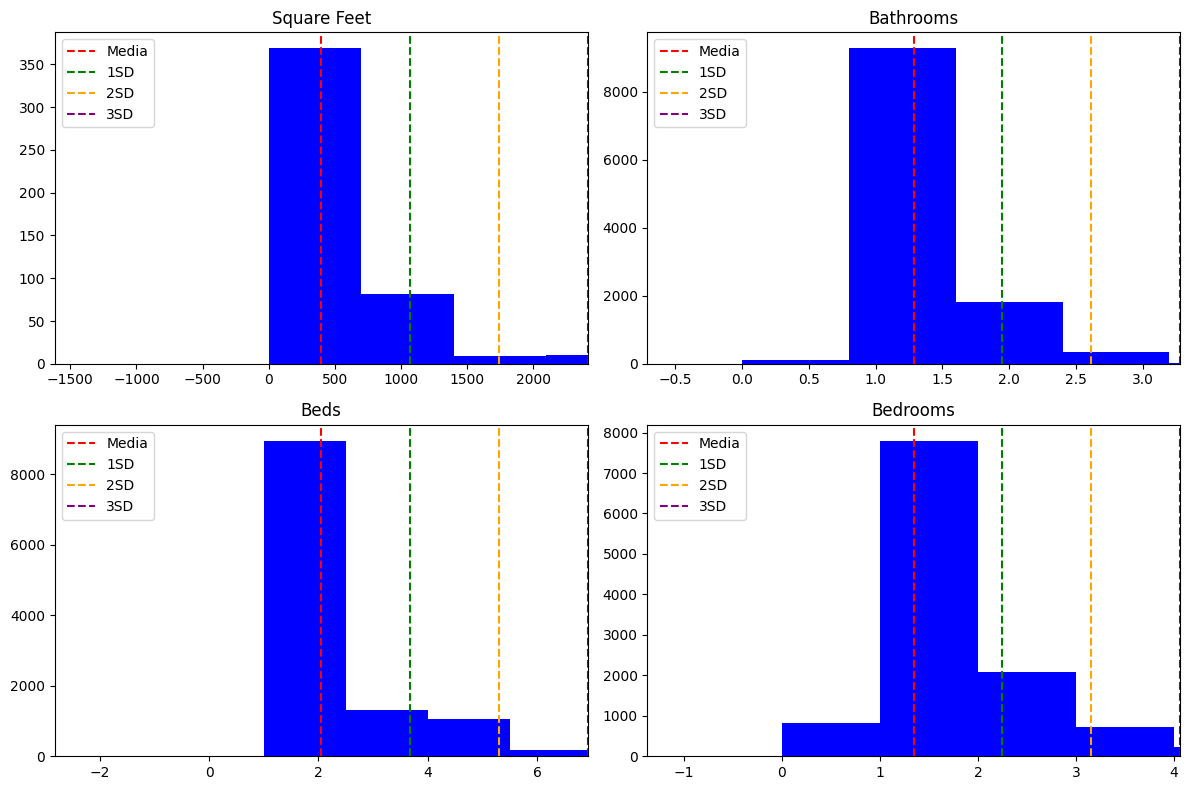

In [10]:
# Datos (Outliers) Opción 1 --> Histograma
# Variables elegidas (Datos Numéricos) relevantes respecto al Precio = (Square Feet, Bathrooms, Beds, Bedrooms)
variables = ['Square Feet', 'Bathrooms', 'Beds', 'Bedrooms']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, variable in enumerate(variables):
    row = i // 2
    col = i % 2
    values = train[variable]
    
    # Media y SD
    mean = values.mean()
    std = values.std()
    
    # Límites para los histogramas (1SD, 2SD y 3SD)
    lower_limit = mean - 3 * std
    upper_limit = mean + 3 * std
    
    # Crear histograma
    axes[row, col].hist(values, bins=10, color='blue')
    axes[row, col].set_title(variable)
    
    # Representar la Media y SD
    axes[row, col].axvline(mean, color='red', linestyle='--', label='Media')
    axes[row, col].axvline(mean + std, color='green', linestyle='--', label='1SD')
    axes[row, col].axvline(mean + 2 * std, color='orange', linestyle='--', label='2SD')
    axes[row, col].axvline(mean + 3 * std, color='purple', linestyle='--', label='3SD')
    
    # Ejes del gráfico
    axes[row, col].set_xlim(lower_limit, upper_limit)
    axes[row, col].legend()

plt.tight_layout()
plt.show()

In [11]:
# Datos (Outliers) Opción 2 --> Conteo simple
# Conteo de c/variable
SquareF_counts = train['Square Feet'].value_counts()
Bathrooms_counts = train['Bathrooms'].value_counts()
Beds_counts = train['Beds'].value_counts()
Bedrooms_counts = train['Bedrooms'].value_counts()

# Dataset para c/variable
squaref_df = pd.DataFrame({'Square Feet': SquareF_counts.index, 'Count': SquareF_counts.values})
bathrooms_df = pd.DataFrame({'Bathrooms': Bathrooms_counts.index, 'Count': Bathrooms_counts.values})
Beds_df = pd.DataFrame({'Beds': Beds_counts.index, 'Count': Beds_counts.values})
Bedrooms_df = pd.DataFrame({'Bedrooms': Bedrooms_counts.index, 'Count': Bedrooms_counts.values})

# Mostrar los datos (Validar datos anómalos) por conteo
print("Tabla de Square Feet:")
print(squaref_df)
print("Tabla de Bathrooms:")
print(bathrooms_df)
print("Tabla de Beds:")
print(Beds_df)
print("Tabla de Bedrooms:")
print(Bedrooms_df)

Tabla de Square Feet:
    Square Feet  Count
0           0.0    196
1         484.0     14
2         646.0     12
3         700.0     11
4        1076.0     11
..          ...    ...
84         85.0      1
85        301.0      1
86       1345.0      1
87       1776.0      1
88         22.0      1

[89 rows x 2 columns]
Tabla de Bathrooms:
    Bathrooms  Count
0         1.0   8853
1         2.0   1832
2         1.5    434
3         3.0    259
4         2.5     98
5         4.0     62
6         0.5     56
7         0.0     53
8         5.0     51
9         6.0     24
10        3.5     22
11        4.5     19
12        5.5      7
13        8.0      4
14        7.0      4
15        6.5      1
16        7.5      1
Tabla de Beds:
    Beds  Count
0    1.0   5862
1    2.0   3088
2    3.0   1317
3    4.0    736
4    5.0    317
5    6.0    188
6    7.0     83
7    8.0     77
8   10.0     42
9    9.0     33
10  16.0     12
11  11.0      9
12  12.0      9
13  14.0      6
14  13.0      5
15  15.0  

In [12]:
# Correlación de las Variables (Análisis inicial solamente datos numéricos)
corrvar_train = train.select_dtypes(include='number')
corr_matrix = corrvar_train.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Host Response Rate,Host Listings Count,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
Host Response Rate,1.000000,-0.009751,-0.009751,0.065430,-0.027406,0.017044,0.041239,0.071843,0.005843,0.071028,0.018291,-0.010782,0.029382,0.067095,0.035251,0.013612,0.001380,-0.143192,-0.121759,-0.109760,-0.028611,0.130260,0.107322,0.087278,0.112881,0.106503,0.097228,0.060017,0.101076,-0.029763,0.180117
Host Listings Count,-0.009751,1.000000,1.000000,0.227313,0.228873,0.182812,0.171575,-0.003152,0.229585,0.119741,0.144134,0.033730,0.246980,0.073878,0.009540,0.023136,0.005001,-0.020744,-0.049307,-0.063419,0.001103,-0.117593,-0.162006,-0.117002,-0.060883,-0.246700,-0.218376,-0.053526,-0.144403,0.919157,-0.152940
Host Total Listings Count,-0.009751,1.000000,1.000000,0.227313,0.228873,0.182812,0.171575,-0.003152,0.229585,0.119741,0.144134,0.033730,0.246980,0.073878,0.009540,0.023136,0.005001,-0.020744,-0.049307,-0.063419,0.001103,-0.117593,-0.162006,-0.117002,-0.060883,-0.246700,-0.218376,-0.053526,-0.144403,0.919157,-0.152940
Accommodates,0.065430,0.227313,0.227313,1.000000,0.432238,0.722825,0.837461,0.444670,0.528380,0.542439,0.470507,0.189783,0.369567,0.563493,0.234834,0.006863,0.001250,-0.016246,-0.027591,-0.047157,0.078856,0.057135,-0.048683,-0.046325,-0.014938,-0.069298,-0.051529,0.011398,-0.055966,0.254506,0.019308
Bathrooms,-0.027406,0.228873,0.228873,0.432238,1.000000,0.523241,0.478647,0.525570,0.379419,0.071403,0.202552,0.211006,0.330133,0.245236,0.082049,0.030451,-0.003067,0.038482,0.009347,-0.006135,0.017988,-0.077081,0.010758,0.005998,0.008362,-0.043889,-0.042465,0.005242,-0.003680,0.282004,-0.089753
Bedrooms,0.017044,0.182812,0.182812,0.722825,0.523241,1.000000,0.728059,0.455824,0.492316,0.346988,0.374822,0.225654,0.376105,0.437503,0.129380,0.020917,0.000252,0.029152,0.001848,-0.022306,0.027786,-0.046992,0.013665,0.007473,0.012273,-0.025612,-0.007607,-0.031293,-0.006140,0.215835,-0.077437
Beds,0.041239,0.171575,0.171575,0.837461,0.478647,0.728059,1.000000,0.411792,0.438198,0.334200,0.348226,0.181243,0.336296,0.454490,0.170570,0.007498,0.001219,0.045299,0.027847,0.004447,0.091545,0.016142,-0.038421,-0.049761,-0.012642,-0.051009,-0.035754,-0.025689,-0.043639,0.212668,-0.038386
Square Feet,0.071843,-0.003152,-0.003152,0.444670,0.525570,0.455824,0.411792,1.000000,0.450778,0.033494,0.118415,0.148767,0.247115,0.262642,0.141350,0.026634,0.040993,0.047498,0.006998,-0.028834,-0.031719,-0.100640,0.041192,0.055559,0.023192,0.039649,0.016009,-0.020139,0.064075,-0.016962,-0.098307
Price,0.005843,0.229585,0.229585,0.528380,0.379419,0.492316,0.438198,0.450778,1.000000,0.880469,0.827679,0.403080,0.674445,0.296850,0.104672,0.029632,0.000851,0.106314,0.064655,0.032864,0.057354,-0.055834,0.061904,0.059643,0.078627,-0.011208,0.005208,0.102186,0.015110,0.223787,-0.092907
Weekly Price,0.071028,0.119741,0.119741,0.542439,0.071403,0.346988,0.334200,0.033494,0.880469,1.000000,0.924147,0.242725,0.519849,0.413722,0.094328,-0.000482,-0.022076,-0.125724,-0.131472,-0.135228,0.004065,0.070187,0.034868,0.069981,0.099825,0.021963,0.025166,0.169572,0.026736,0.107879,0.038605


## 3. Preprocesamiento de los Datos

### 3.1 Transformaciones y Limpieza de (datos en bruto)

#### * Codificación de Variables (No numéricas), * Imputación de Datos (Nulls)
#### * Eliminación de variables: Selección (Random Forest/Lasso), Validar Correlación, Validación de Missings
#### * Generación de variables

In [13]:
# Codificación de variables Categóricas (No numéricas) --> variables_categoricas.columns

le_street = LabelEncoder()
le_neighbhd = LabelEncoder()
le_neighbhd_cld = LabelEncoder()
le_neighbhd_grp_cld = LabelEncoder()
le_city = LabelEncoder()
le_state = LabelEncoder()
le_country = LabelEncoder()
le_ptype = LabelEncoder()
le_rtype = LabelEncoder()
le_btype = LabelEncoder()
le_amenities = LabelEncoder()

train['Street'] = le_street.fit_transform(train['Street'])
train['Neighbourhood'] = le_neighbhd.fit_transform(train['Neighbourhood'])
train['Neighbourhood Cleansed'] = le_neighbhd_cld.fit_transform(train['Neighbourhood Cleansed'])
train['Neighbourhood Group Cleansed'] = le_neighbhd_grp_cld.fit_transform(train['Neighbourhood Group Cleansed'])
train['City'] = le_city.fit_transform(train['City'])
train['State'] = le_state.fit_transform(train['State'])
train['Country'] = le_country.fit_transform(train['Country'])
train['Property Type'] = le_ptype.fit_transform(train['Property Type'])
train['Room Type'] = le_rtype.fit_transform(train['Room Type'])
train['Bed Type'] = le_btype.fit_transform(train['Bed Type'])
train['Amenities'] = le_amenities.fit_transform(train['Amenities'])

In [14]:
# Imputación de datos null de Variable (Square Feet: 11350 nulls) --> variables_con_nulls

# Cálculo de la Media y la Mediana (Para determinar el dato a utilizar en la imputación)
mean_value = train['Square Feet'].mean()
median_value = train['Square Feet'].median()

print(f"Media: {mean_value}")
print(f"Mediana: {median_value}")

Media: 396.48945147679325
Mediana: 90.0


In [15]:
# Uso de la Mediana debido a que (Square Feet contienen valores atípicos: +2SD y +3SD)
## La Mediana es más robusta a los valores extremos

train['Square Feet'].fillna(train['Square Feet'].median(), inplace=True)
train.head().T

,2472,12299,4024,12692,11228
Host Response Rate,100.0,100.00,100.0,100.0,100.00
Host Listings Count,2.0,1.00,16.0,114.0,2.00
Host Total Listings Count,2.0,1.00,16.0,114.0,2.00
Street,585.0,779.00,241.0,779.0,479.00
Neighbourhood,150.0,351.00,46.0,351.0,115.00
Neighbourhood Cleansed,189.0,345.00,390.0,130.0,149.00
Neighbourhood Group Cleansed,34.0,8.00,7.0,8.0,10.00
City,106.0,106.00,106.0,106.0,106.00
State,26.0,26.00,26.0,26.0,0.00
Country,13.0,13.00,13.0,13.0,13.00


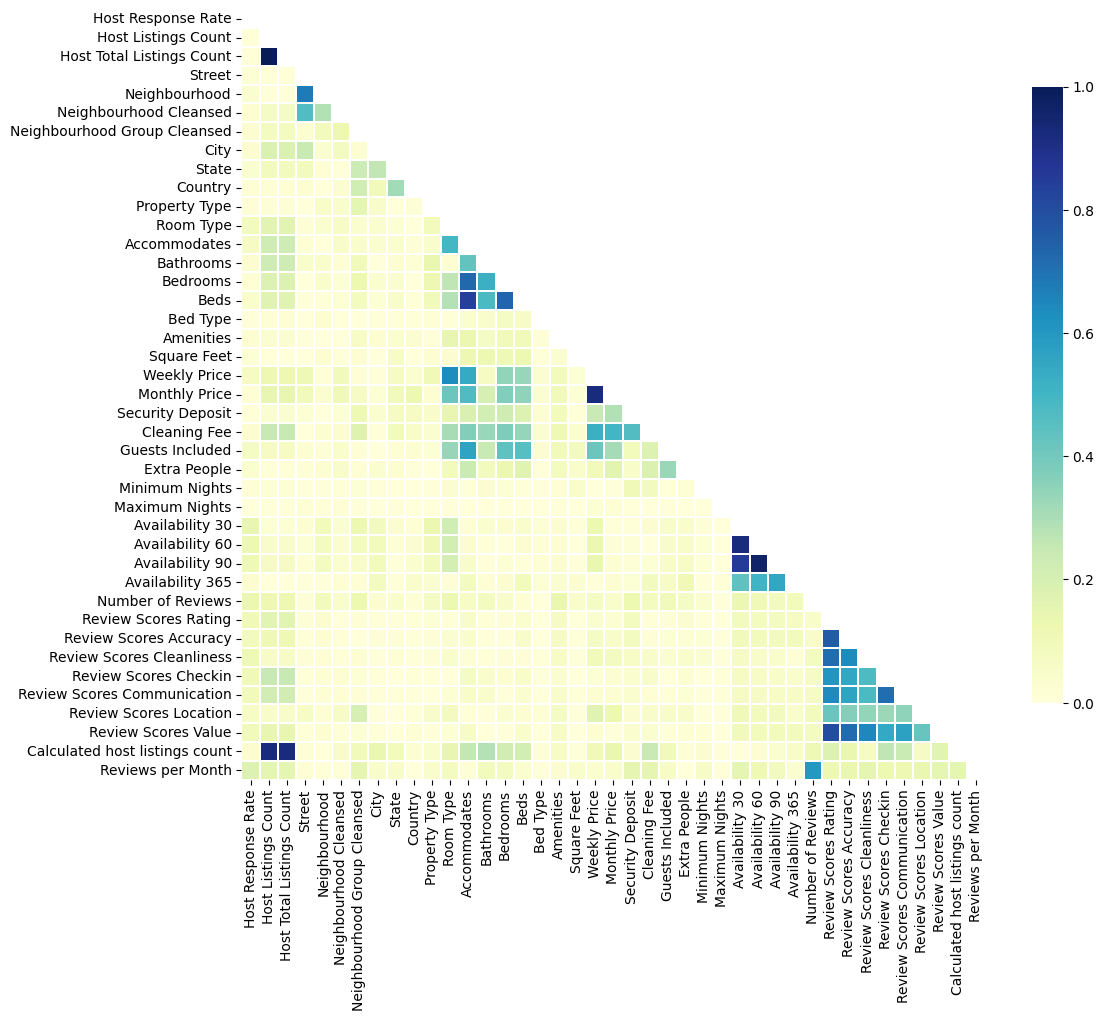

In [16]:
# Matriz de Correlación

# Obtener la matriz de correlación
corr = np.abs(train.drop(['Price'], axis=1).corr())

# Generar una máscara para el triángulo superior
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(12, 10))

# Dibujrar el mapa de calor con la máscara y el ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [17]:
# Rangos estimados de validación de correlación 

## Entre 0.7 y 1: Correlación positiva fuerte
## Entre 0.3 y 0.7: Correlación positiva moderada --> "Rango óptimo"
## Entre 0.1 y 0.3: Correlación positiva débil

# Eliminación de Variables con Correlación positiva fuerte

train = train.drop(['Host Total Listings Count', 'Calculated host listings count', 'Host Listings Count', 
                          'Monthly Price', 'Availability 30', 'Availability 90', 'Review Scores Rating'], axis = 1) 

# Eliminación de Variables que bajo criterio no son relevantes

train = train.drop(['Host Response Rate', 'Street', 'City', 'State', 'Country', 'Number of Reviews', 'Review Scores Location'], axis = 1) 

train.head().T

,2472,12299,4024,12692,11228
Neighbourhood,150.0,351.00,46.0,351.0,115.00
Neighbourhood Cleansed,189.0,345.00,390.0,130.0,149.00
Neighbourhood Group Cleansed,34.0,8.00,7.0,8.0,10.00
Property Type,0.0,0.00,0.0,0.0,0.00
Room Type,0.0,0.00,2.0,1.0,1.00
Accommodates,4.0,4.00,1.0,2.0,2.00
Bathrooms,1.0,1.00,1.5,3.0,1.00
Bedrooms,1.0,1.00,1.0,1.0,1.00
Beds,2.0,2.00,8.0,1.0,1.00
Bed Type,4.0,4.00,4.0,4.0,4.00


In [18]:
# Imputación de valores faltantes (missings)

## Mediana de cada columna 
column_medians = train.median()  

## Rellenar los valores faltantes con las medianas correspondientes (La Mediana es más robusta a los valores extremos) 
train = train.fillna(column_medians)  

train.head().T

,2472,12299,4024,12692,11228
Neighbourhood,150.0,351.00,46.00,351.00,115.00
Neighbourhood Cleansed,189.0,345.00,390.00,130.00,149.00
Neighbourhood Group Cleansed,34.0,8.00,7.00,8.00,10.00
Property Type,0.0,0.00,0.00,0.00,0.00
Room Type,0.0,0.00,2.00,1.00,1.00
Accommodates,4.0,4.00,1.00,2.00,2.00
Bathrooms,1.0,1.00,1.50,3.00,1.00
Bedrooms,1.0,1.00,1.00,1.00,1.00
Beds,2.0,2.00,8.00,1.00,1.00
Bed Type,4.0,4.00,4.00,4.00,4.00


In [19]:
# Imputar valores anómalos (outliers) --> ({..counts.values})
## Definir valores hasta 2SD

train = train[(train['Square Feet'] >= 1) & (train['Square Feet'] <= 1400)]
train = train[(train['Bathrooms'] >= 1) & (train['Bathrooms'] <= 3)]
train = train[(train['Beds'] >= 1) & (train['Beds'] <= 5)]
train = train[(train['Bedrooms'] >= 1) & (train['Bedrooms'] <= 3)]

# Variables de tipo object a int64
float_var = train.select_dtypes(include=['object']).columns
train[float_var] = train[float_var].astype('int64')

In [20]:
# Variables Seleccionadas para desarrollar los Modelos para Predicción)
# Dimensión del Dataset Train (Número de Variables para Predicción)

print(train.columns)
train.shape

Index(['Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
       'Amenities', 'Square Feet', 'Price', 'Weekly Price', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Availability 60', 'Availability 365',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Value', 'Reviews per Month'],
      dtype='object')


(10061, 28)

## 4. Modelado

### 4.1 Predecir (Explicar) el comportamiento de los datos 

#### * Definir datos para Test
#### * Definir Métricas y Modelos de Predicción 
#### * Realizar Mediciones (Predicciones)

In [21]:
# Datos para Test

# Codificación de variables Categóricas (No numéricas) --> variables_categoricas.columns

test['Neighbourhood'] = le_neighbhd.fit_transform(test['Neighbourhood'])
test['Neighbourhood Cleansed'] = le_neighbhd_cld.fit_transform(test['Neighbourhood Cleansed'])
test['Neighbourhood Group Cleansed'] = le_neighbhd_grp_cld.fit_transform(test['Neighbourhood Group Cleansed'])
test['Property Type'] = le_ptype.fit_transform(test['Property Type'])
test['Room Type'] = le_rtype.fit_transform(test['Room Type'])
test['Bed Type'] = le_btype.fit_transform(test['Bed Type'])
test['Amenities'] = le_amenities.fit_transform(test['Amenities'])

# Eliminación de Variables con Correlación positiva fuerte

test = test.drop(['Host Total Listings Count', 'Calculated host listings count', 'Host Listings Count', 
                          'Monthly Price', 'Availability 30', 'Availability 90', 'Review Scores Rating'], axis = 1) 

# Eliminación de Variables que bajo criterio no son relevantes

test = test.drop(['Host Response Rate', 'Street', 'City', 'State', 'Country', 'Number of Reviews', 'Review Scores Location'], axis = 1) 

# Imputación de valores faltantes (missings)

## Mediana de cada columna 
column_medians = test.median()  

## Rellenar los valores faltantes con las medianas correspondientes (La Mediana es más robusta a los valores extremos) 
test = test.fillna(column_medians)

# Imputar valores anómalos (outliers) --> ({..counts.values})
## Definir valores hasta 2SD

test = test[(test['Square Feet'] >= 1) & (test['Square Feet'] <= 1400)]
test = test[(test['Bathrooms'] >= 1) & (test['Bathrooms'] <= 3)]
test = test[(test['Beds'] >= 1) & (test['Beds'] <= 5)]
test = test[(test['Bedrooms'] >= 1) & (test['Bedrooms'] <= 3)]

test.head()

,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,...,Minimum Nights,Maximum Nights,Availability 60,Availability 365,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Value,Reviews per Month
9612,163,135,38,0,1,1,1.0,1.0,1.0,3,...,1,1125,16,46,10.0,10.0,10.0,10.0,10.0,1.59
4447,112,160,4,0,1,1,1.0,1.0,1.0,2,...,3,1125,5,310,10.0,10.0,10.0,10.0,10.0,1.20
8936,172,11,6,0,0,2,1.0,1.0,1.0,3,...,1,1125,9,120,10.0,10.0,10.0,10.0,9.0,1.17
4006,172,136,16,0,1,1,1.0,1.0,1.0,3,...,1,1125,58,363,10.0,10.0,10.0,10.0,10.0,0.24
8900,35,236,8,0,0,4,1.0,1.0,2.0,3,...,2,1125,21,306,10.0,10.0,10.0,10.0,9.0,2.24


In [22]:
test.shape

(2559, 28)

In [23]:
# Modelo.1 --> Linear Regression
## X_train, X_test & y_train, y_test

# Características (x = X_train, X_test), Variable Objetivo (y = y_train, y_test)
X_train = train.drop('Price', axis=1)
y_train = train['Price']
X_test = test.drop('Price', axis=1)
y_test = test['Price']

# Modelo de regresión lineal = lr_model
lr_model = LinearRegression()

# Entrenamiento del modelo
lr_model.fit(X_train, y_train)

# Predicción (Datos --> Train)
y_train_pred_rl = lr_model.predict(X_train)

# Calculo de R^2 (Datos --> Train)
r2_train = r2_score(y_train, y_train_pred_rl)
print("Train:", r2_train)

# Predicción (Datos --> Test)
y_test_pred_rl = lr_model.predict(X_test)

# Calculo de R^2 (Datos --> Test)
r2_test = r2_score(y_test, y_test_pred_rl)
print("Test:", r2_test)

Train: 0.3563250820801489
Test: 0.3823836213396269


In [24]:
# Validación Cruzada = CV
scores = cross_val_score(lr_model, X_train, y_train, cv=5)  

print("Puntuaciones de CV:", scores)
print("Puntuación promedio:", scores.mean())

Puntuaciones de CV: [0.38976071 0.41651474 0.31001522 0.33864737 0.31118404]
Puntuación promedio: 0.35322441714312924


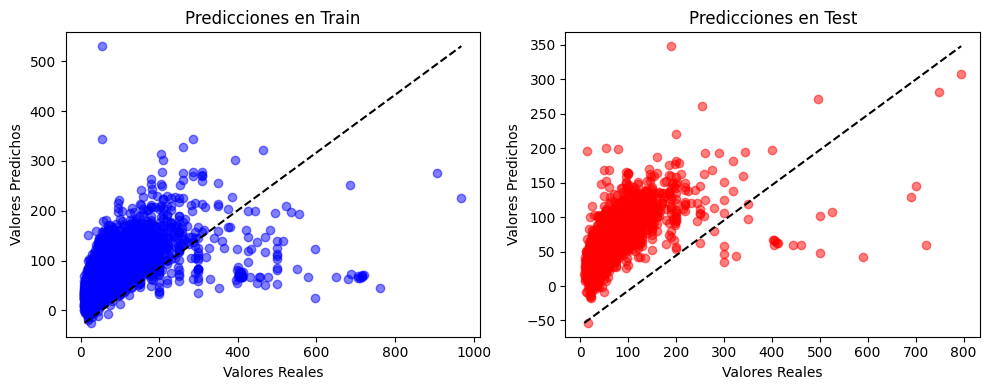

In [25]:
# Figura con Subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Gráfico (Datos --> Train)
ax1.scatter(y_train, y_train_pred_rl, color='blue', alpha=0.5)
ax1.plot([min(y_train), max(y_train)], [min(y_train_pred_rl), max(y_train_pred_rl)],
         color='black', linestyle='--')
ax1.set_xlabel('Valores Reales')
ax1.set_ylabel('Valores Predichos')
ax1.set_title('Predicciones en Train')

# Gráfico (Datos --> Test)
ax2.scatter(y_test, y_test_pred_rl, color='red', alpha=0.5)
ax2.plot([min(y_test), max(y_test)], [min(y_test_pred_rl), max(y_test_pred_rl)],
         color='black', linestyle='--')
ax2.set_xlabel('Valores Reales')
ax2.set_ylabel('Valores Predichos')
ax2.set_title('Predicciones en Test')

plt.tight_layout()
plt.show()

best mean cross-validation score: 0.590
best parameters: {'max_depth': 11}


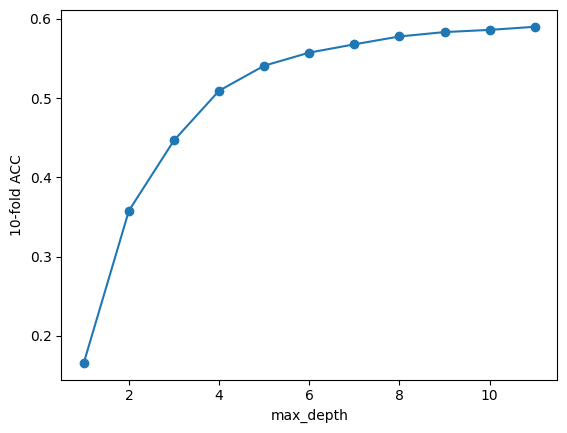

In [27]:
# Modelo.2 --> Random Forest

# Búsqueda de mejores Hiperparámetros
maxDepth = range(1,12)
n_estimators = [100, 200, 300, 500, 1000, 1500, 2000]

# Hiperparámetros (Exploración en la búsqueda de cuadrícula = {'max_depth': maxDepth, 'n_estimators': n_estimators})
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='auto'), param_grid=tuned_parameters,cv=3) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [28]:
# Mejores Parámetros y Modelado
maxDepthOptimo = grid.best_params_['max_depth']
rf = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='auto').fit(X_train,y_train) 

print("Train: ",rf.score(X_train,y_train))
print("Test: ",rf.score(X_test,y_test))

Train:  0.8298745968784873
Test:  0.4024530083931981


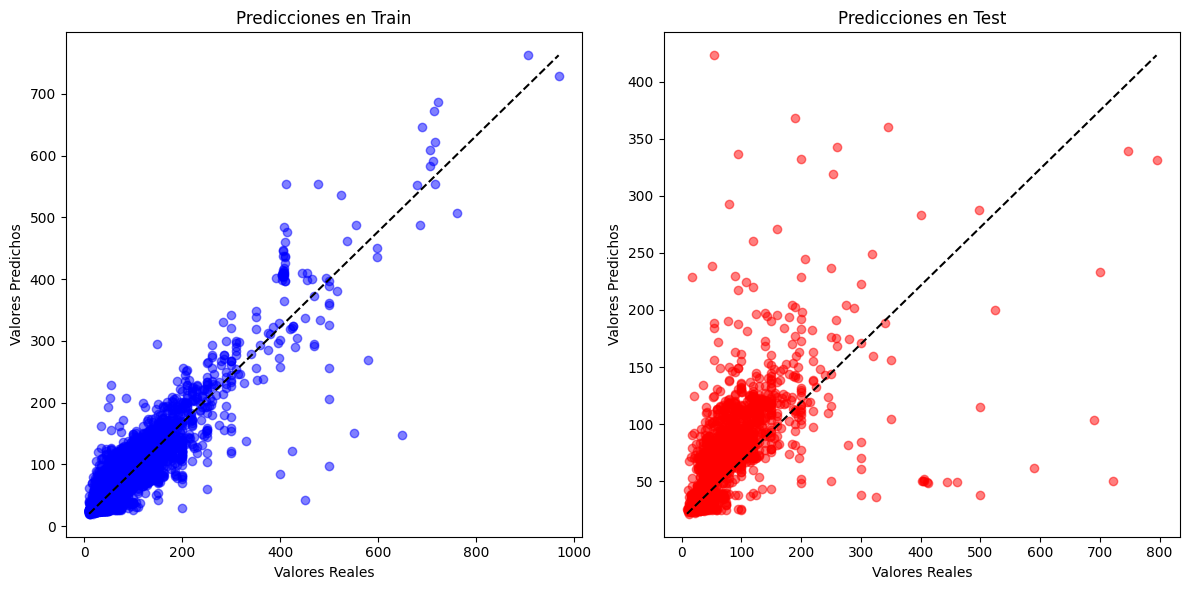

In [29]:
# Predicciones en Train y Test
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Figura con Subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico (Datos --> Train)
ax1.scatter(y_train, y_train_pred_rf, color='blue', alpha=0.5)
ax1.plot([min(y_train), max(y_train)], [min(y_train_pred_rf), max(y_train_pred_rf)],
         color='black', linestyle='--')
ax1.set_xlabel('Valores Reales')
ax1.set_ylabel('Valores Predichos')
ax1.set_title('Predicciones en Train')

# Gráfico (Datos --> Test)
ax2.scatter(y_test, y_test_pred_rf, color='red', alpha=0.5)
ax2.plot([min(y_test), max(y_test)], [min(y_test_pred_rf), max(y_test_pred_rf)],
         color='black', linestyle='--')
ax2.set_xlabel('Valores Reales')
ax2.set_ylabel('Valores Predichos')
ax2.set_title('Predicciones en Test')

plt.tight_layout()
plt.show()

In [30]:
# Modelo.3 --> XGBoost

# XGBoost (Regresión)
xgbt = XGBRegressor(random_state=0, max_depth=3,learning_rate=0.01, n_estimators=500).fit(X_train,y_train)
xgbt.fit(X_train,y_train)

print("Train: ",xgbt.score(X_train,y_train))
print("Test: ",xgbt.score(X_test,y_test))

Train:  0.611849581912205
Test:  0.4250214333946364


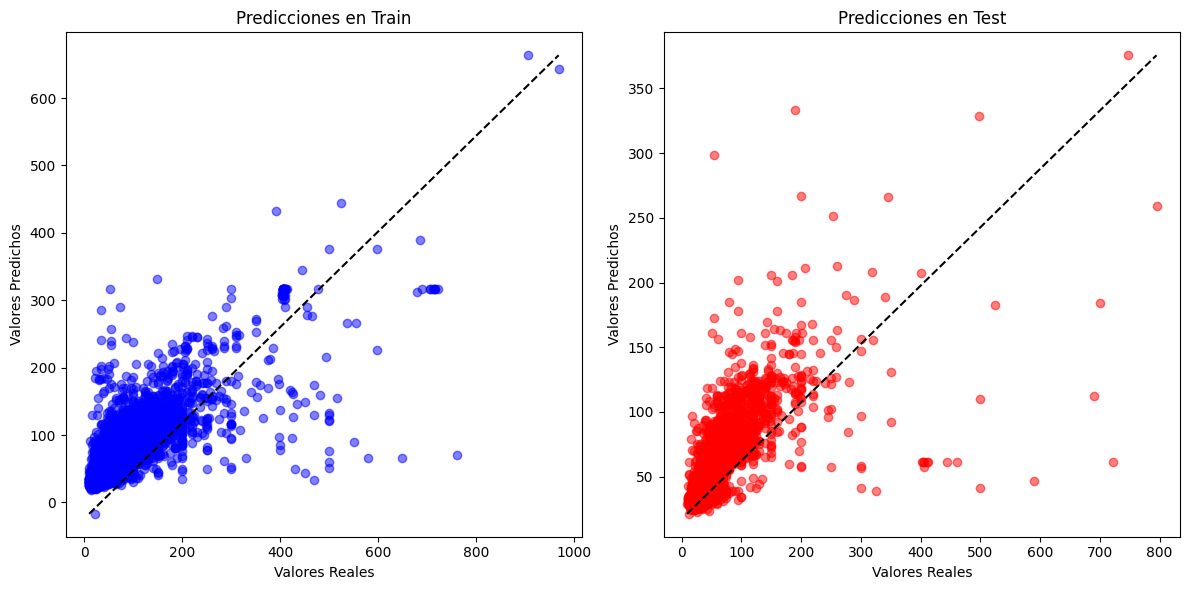

In [32]:
# Predicciones (Train y Test)
y_train_pred_xgbt = xgbt.predict(X_train)
y_test_pred_xgbt = xgbt.predict(X_test)

# Figura con Subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico (Datos --> Train)
ax1.scatter(y_train, y_train_pred_xgbt, color='blue', alpha=0.5)
ax1.plot([min(y_train), max(y_train)], [min(y_train_pred_xgbt), max(y_train_pred_xgbt)],
         color='black', linestyle='--')
ax1.set_xlabel('Valores Reales')
ax1.set_ylabel('Valores Predichos')
ax1.set_title('Predicciones en Train')

# Gráfico (Datos --> Test)
ax2.scatter(y_test, y_test_pred_xgbt, color='red', alpha=0.5)
ax2.plot([min(y_test), max(y_test)], [min(y_test_pred_xgbt), max(y_test_pred_xgbt)],
         color='black', linestyle='--')
ax2.set_xlabel('Valores Reales')
ax2.set_ylabel('Valores Predichos')
ax2.set_title('Predicciones en Test')

plt.tight_layout()
plt.show()

In [33]:
# Modelo.4 --> LightGBM

import lightgbm as lgb

# LightGBM
bt = lgb.LGBMRegressor(random_state=0, max_depth=3,learning_rate=0.01, n_estimators=500)
bt.fit(X_train,y_train)

print("Train: ",bt.score(X_train,y_train))
print("Test: ",bt.score(X_test,y_test))

Train:  0.5919120749005424
Test:  0.42402884563336163


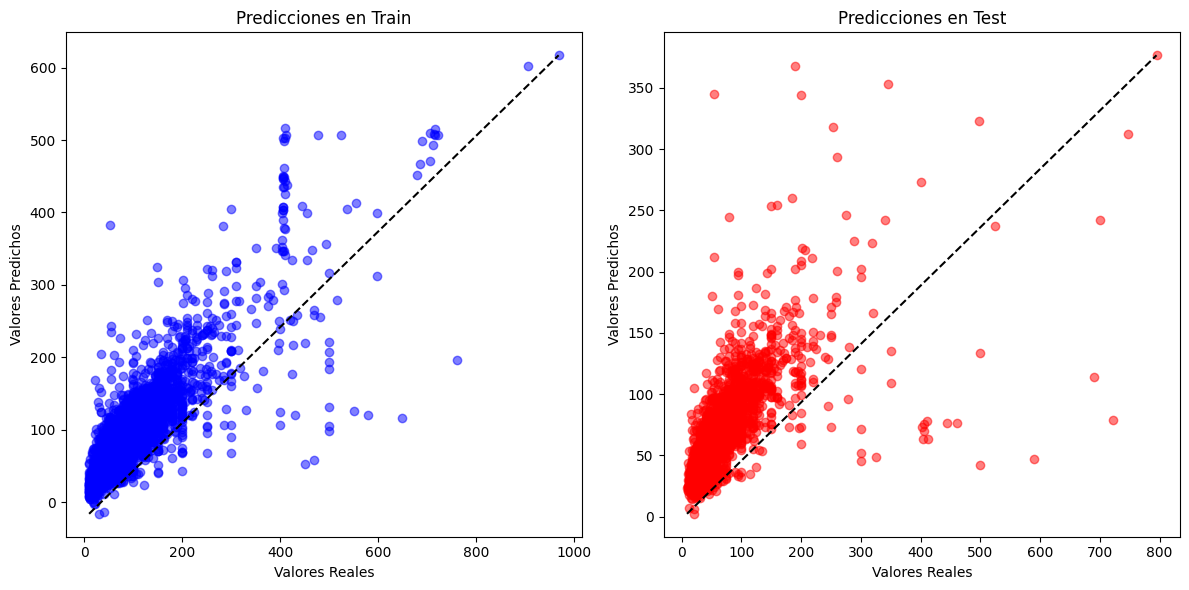

In [34]:
# Modelo LightGBM
model_lgb = lgb.LGBMRegressor(boosting_type='gbdt', max_depth=6, n_estimators=100, learning_rate=0.1)
model_lgb.fit(X_train, y_train)

# Predicciones (Train y Test)
y_train_pred_lgb = model_lgb.predict(X_train)
y_test_pred_lgb = model_lgb.predict(X_test)

# Figura con Subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico (Datos --> Train)
ax1.scatter(y_train, y_train_pred_lgb, color='blue', alpha=0.5)
ax1.plot([min(y_train), max(y_train)], [min(y_train_pred_lgb), max(y_train_pred_lgb)],
         color='black', linestyle='--')
ax1.set_xlabel('Valores Reales')
ax1.set_ylabel('Valores Predichos')
ax1.set_title('Predicciones en Train')

# Gráfico (Datos --> Test)
ax2.scatter(y_test, y_test_pred_lgb, color='red', alpha=0.5)
ax2.plot([min(y_test), max(y_test)], [min(y_test_pred_lgb), max(y_test_pred_lgb)],
         color='black', linestyle='--')
ax2.set_xlabel('Valores Reales')
ax2.set_ylabel('Valores Predichos')
ax2.set_title('Predicciones en Test')

plt.tight_layout()
plt.show()

## 5. Conclusiones

1. Se desarrollaron todas las etapas del proyecto (Preparación de los Datos, Análisis Exploratorio de los Datos, Preprocesamiento de los Datos y Modelado).

2. Del total de los Datos, 80% se destinaron para Train y 20% para Test.

3. En el Análisis Exploratorio de los Datos, se identificaron y clasificaron las variables con mayor número de datos Nulls, se identificaron los valores (Outliers) de las variables seleccionadas como más significativas, y se realizó análisis de correlación de los datos (en bruto) para identificar los tipos de relación entre las diferentes variables.

4. En el Preprocesamiento de los Datos, se realizó la Codificación de Variables Categóricas. En la imputación de los datos (Nulls) se determinó que la Mediana era el valor más acertado, debido a que es un valor robusto cuando se presentan valores extremos (Outliers). Se realizó de nuevo una Correlación de Variables (Con datos preprocesados) y se determinó que el "Rango óptimo" estaba entre 0.3 y 0.7 (Correlación positiva moderada), en correlaciones por encima de 0.7 se realizó (Drop) a las variables con Correlación positiva alta con la intención de disminuir el sesgo.

5. Se realizaron 4 Modelos, los cuáles mostraron los siguientes resultados:
- Modelo.1 --> Regresión Lineal: r2: Train=0.36, Test=0.38
- Modelo.2 --> Random Forest (Regressor): best mean CV score=0.590, max_depth=11, Train=0.83 Test=0.40 
- Modelo.3 --> XGBoost: Train=0.612, Test=0.43
- Modelo.4 --> LightGBM: Train=0.60, Test=0.42 
* (Nota: Random Forest, tuvo un costo de procesamiento mayor respecto a los demás)
* (Random Forest: Mostró los mejores resultados)